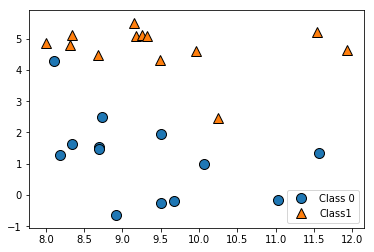

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn
X, y = mglearn.datasets.make_forge()
# 二クラスのプロット
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class1"], loc=4)

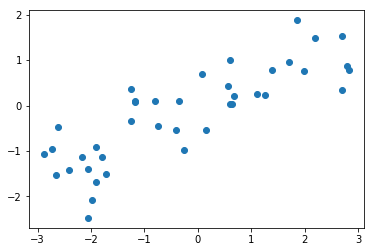

In [13]:
%matplotlib inline
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')

In [21]:
# ボストン犯罪率データ
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape;{}".format(boston.data.shape))
# 交互作用(特徴量間の積)を追加したデータ
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

Data shape;(506, 13)
X.shape: (506, 104)


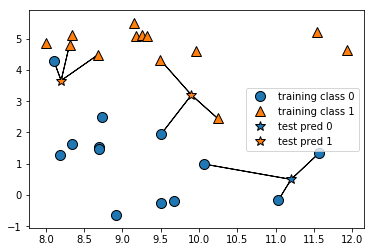

In [24]:
# k-NN visual
mglearn.plots.plot_knn_classification(n_neighbors=3)

X_train shape: (19, 2)
y_train shape: (19,)
X_test shape: (7, 2)
y_test shape: (7,)
Test set accuracy: 0.86


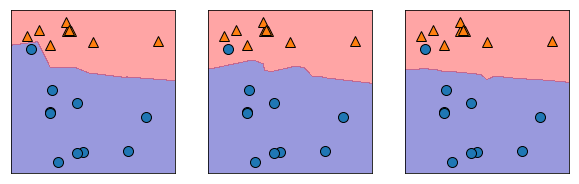

In [37]:
# k-NN Fitting
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# TrainとTestに分ける
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
# kNNインスタンス
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# Fittingといってもデータを散りばめるだけ
clf.fit(X_train,y_train)
# 結果
print("Test set accuracy: {:.2f}".format(clf.score(X_test,y_test)))
# 決定境界可視化
fig, axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    #インスタンスを生成しながらFitting
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train,ax=ax)

In [39]:
# 乳がんデータ
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
# 悪性・良性の数カウント ------------np.bincount--------------------- zip関数
print("Sample counts per class:\n{}".format({n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))
# TrainとTestに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Sample counts per class:
{'malignant': 212, 'benign': 357}
X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [ ]:
# 汎化性能vs近傍パラメータ
training_accuracy = []
test_accuracy = []